###  **Attribute Information**

1. **`student_id`** *(string)*
   Unique identifier for each student (e.g., S1000, S1001, ...).

2. **`age`** *(integer)*
   Age of the student in years.

3. **`gender`** *(categorical: Male, Female, Other)*
   Gender identity of the student.

4. **`study_hours_per_day`** *(float)*
   Average number of hours the student spends studying per day.

5. **`social_media_hours`** *(float)*
   Average daily hours spent on social media platforms.

6. **`netflix_hours`** *(float)*
   Average daily hours spent watching Netflix or similar streaming services.

7. **`part_time_job`** *(categorical: Yes, No)*
   Indicates whether the student has a part-time job.

8. **`attendance_percentage`** *(float)*
   Class attendance as a percentage (0–100%).

9. **`sleep_hours`** *(float)*
   Average number of sleep hours per day.

10. **`diet_quality`** *(categorical: Poor, Fair, Good, Excellent)*
    Self-reported dietary quality.

11. **`exercise_frequency`** *(integer)*
    Number of exercise sessions per week.

12. **`parental_education_level`** *(categorical: No Formal Education, High School, Bachelor, Master, PhD)*
    Highest education level attained by either parent.

13. **`internet_quality`** *(categorical: Poor, Average, Good, Excellent)*
    Quality of internet access at home.

14. **`mental_health_rating`** *(integer: 1–10)*
    Self-assessed mental health score, where 1 is poor and 10 is excellent.

15. **`extracurricular_participation`** *(categorical: Yes, No)*
    Indicates if the student participates in extracurricular activities.

16. **`exam_score`** *(float)*
    Final exam score (0–100 scale).


## Student Performance Dataset 
*Data Set Information:*

This dataset captures the relationship between students' lifestyle habits and their academic performance. It includes information on daily routines such as study hours, screen time, sleep patterns, and diet, as well as socio-economic factors like parental education and internet quality. Additionally, it records exam scores and mental health ratings, providing a comprehensive view of how various behavioral and environmental factors may influence academic success. The dataset consists of 1,000 student records, making it suitable for educational data analysis, correlation studies, and machine learning models aimed at predicting academic outcomes.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('student_habits_performance.csv')

In [8]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## Data Cleaning 

Cheacking for missing values

In [10]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

The dataset has data of two different region . We are gonna assign it labels according to which area it belongs to.

Removing Null Values: as only 1-2 columns contain null values they can easily be dropped 

In [11]:
df=df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Removing the 122 row because it also contained column names 

In [12]:
df=df.drop(122).reset_index(drop=True)

Fixing spaces in column names 

In [13]:
df.columns=df.columns.str.strip()
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

Changing the data types of columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    obj

## EDA

In [ ]:
df=df.drop(['student_id', 'gender'],axis=1)

In [25]:
df['parental_education_level'].unique()
df['diet_quality'].unique()
#df['internet_quality'].unique()


array(['Fair', 'Good', 'Poor'], dtype=object)

In [18]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#Encoding classes for dfCopy
df['part_time_job']=np.where(dfCopy['part_time_job']=='No',0,1)
df['extracurricular_participation']=np.where(df['extracurricular_participation']=='not fire',0,1)
df['parental_education_level'] = df['parental_education_level'].map({
    'High School': 0,
    'Bachelor': 1,
    'Master': 2
})
df['internet_quality'] = df['internet_quality'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2
})
df['diet_quality'] = df['diet_quality'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2
})
 

In [27]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,1,6,2,NaN,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,2,6,0,NaN,8,1,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,0,1,0,0.0,1,1,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,0,4,2,2.0,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,1,3,2,2.0,1,1,66.4


# Plotting

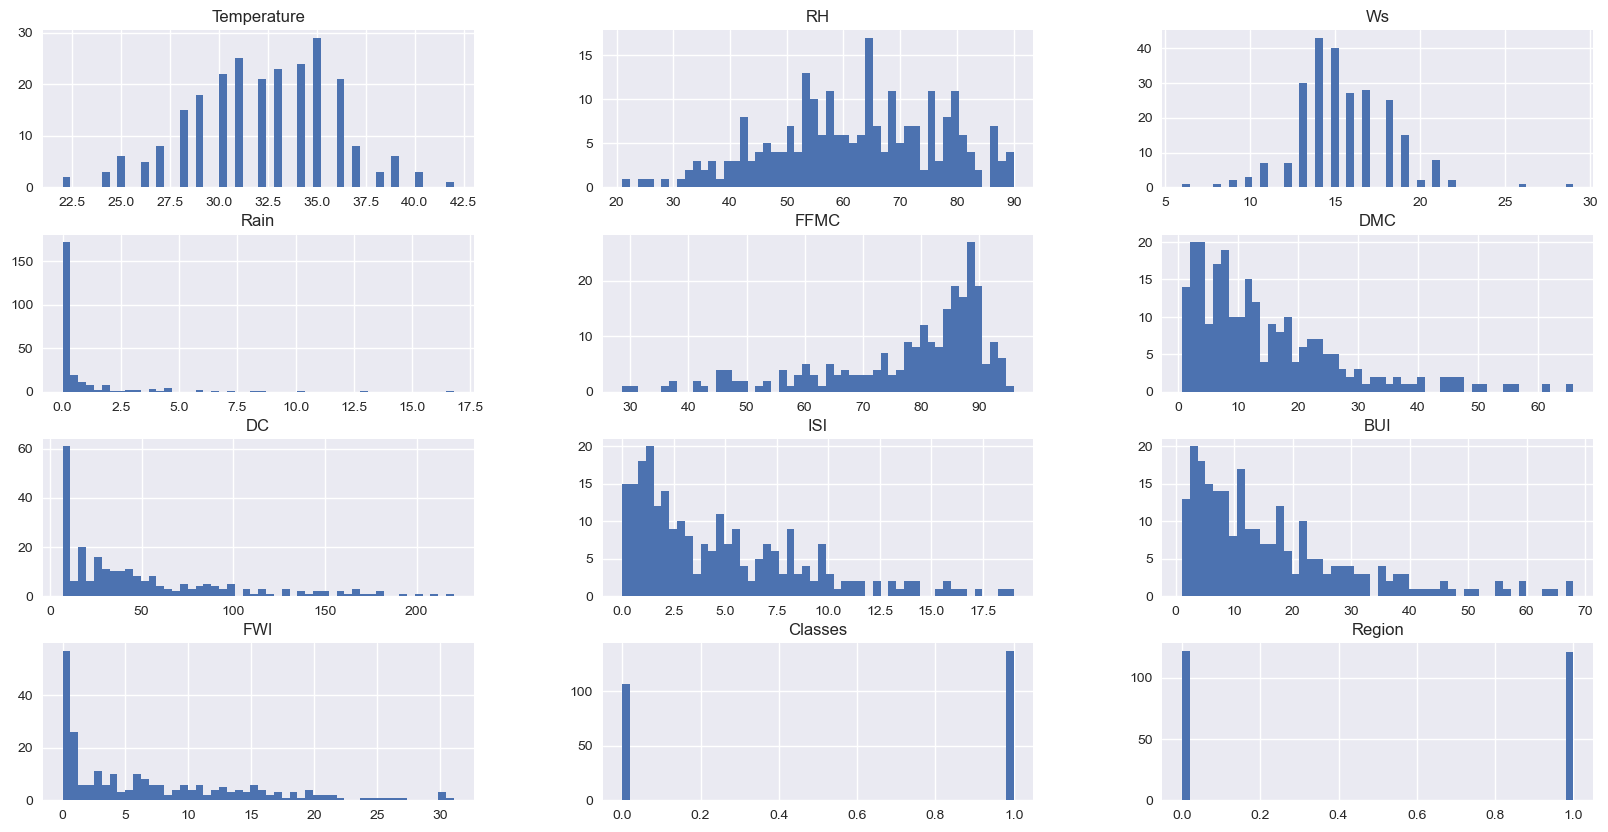

In [23]:
plt.style.use('seaborn-v0_8')
dfCopy.hist(bins=50,figsize=(20,10))
plt.show()

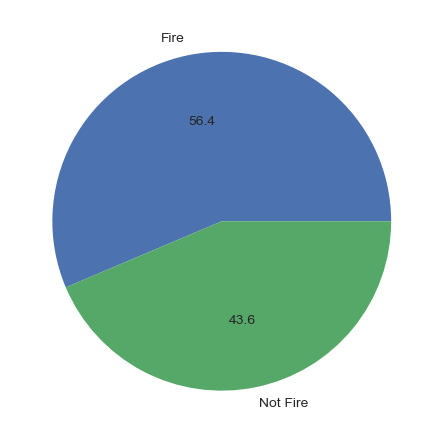

In [24]:
percentage=dfCopy['Classes'].value_counts(normalize=True)
classlabels=['Fire','Not Fire']
plt.pie(percentage,labels=classlabels,autopct='%1.1f')
plt.show()

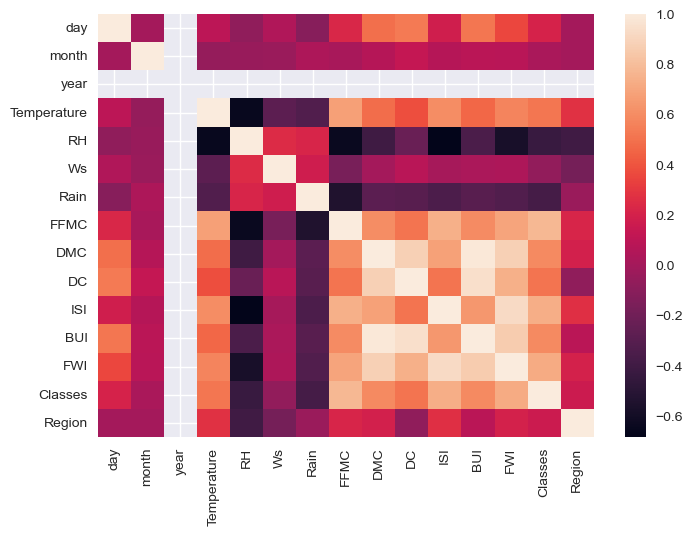

In [25]:
sns.heatmap(df.corr())
plt.show()

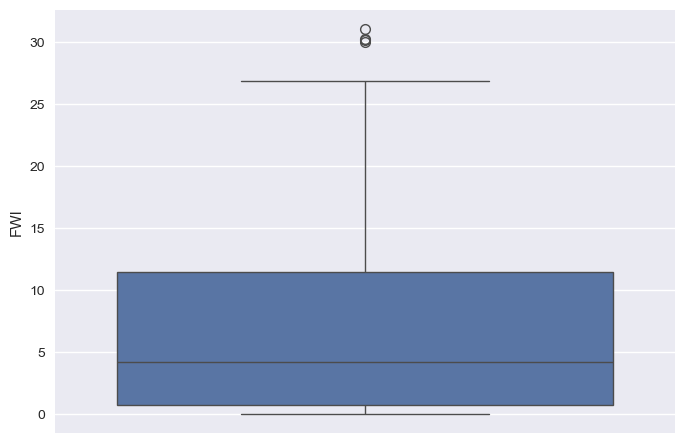

In [26]:
sns.boxplot(df['FWI'])
plt.show()

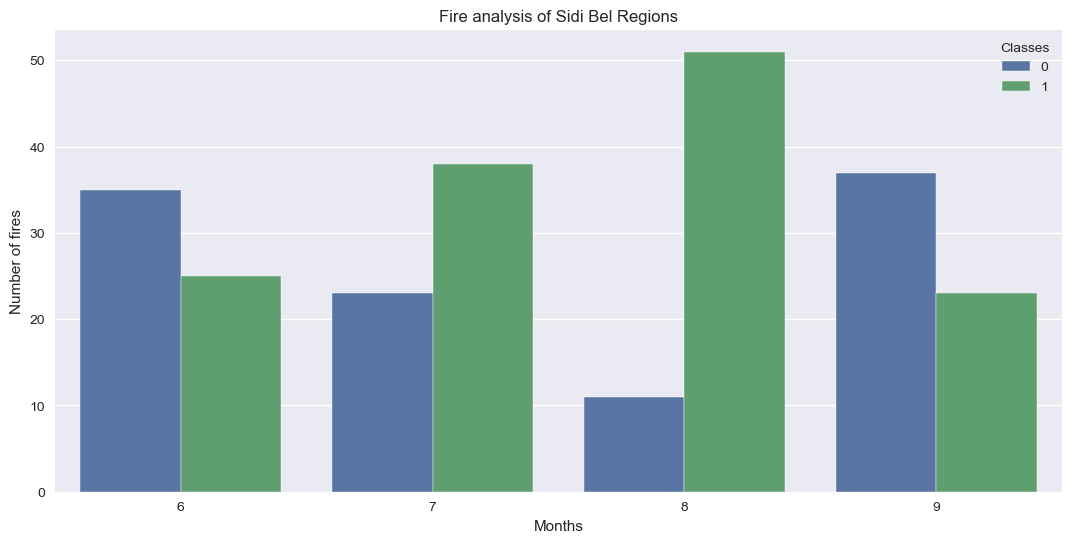

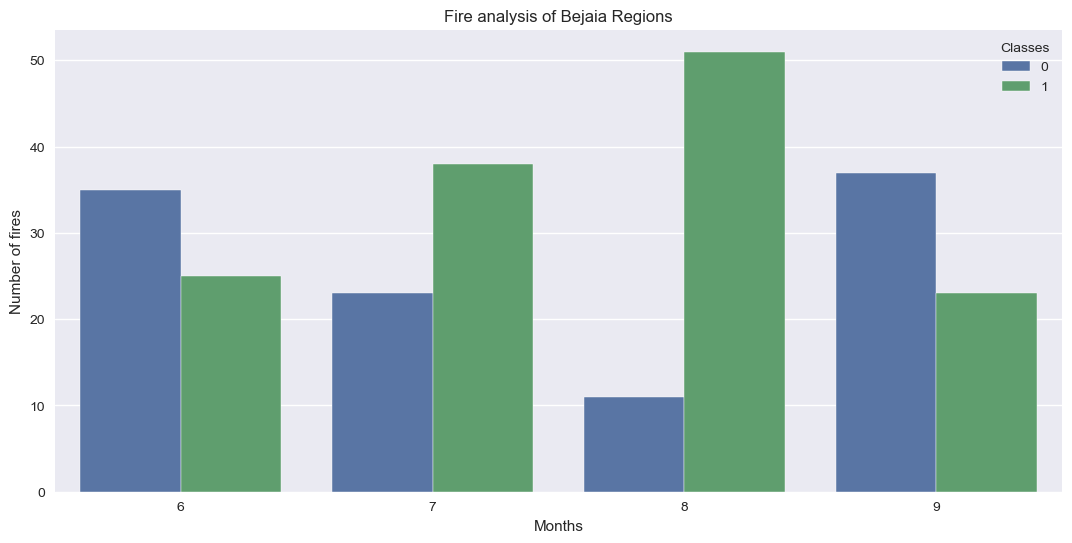

In [27]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires')
plt.xlabel('Months')
plt.title('Fire analysis of Sidi Bel Regions')
plt.show()
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires')
plt.xlabel('Months')
plt.title('Fire analysis of Bejaia Regions')
plt.show()

## Model Training 

In [28]:
df.to_csv("cleanedForGraph.csv")
df=df.drop(['day', 'month', 'year'],axis=1)


In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
X=df.drop('FWI',axis=1)
y=df['FWI']

Train test split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

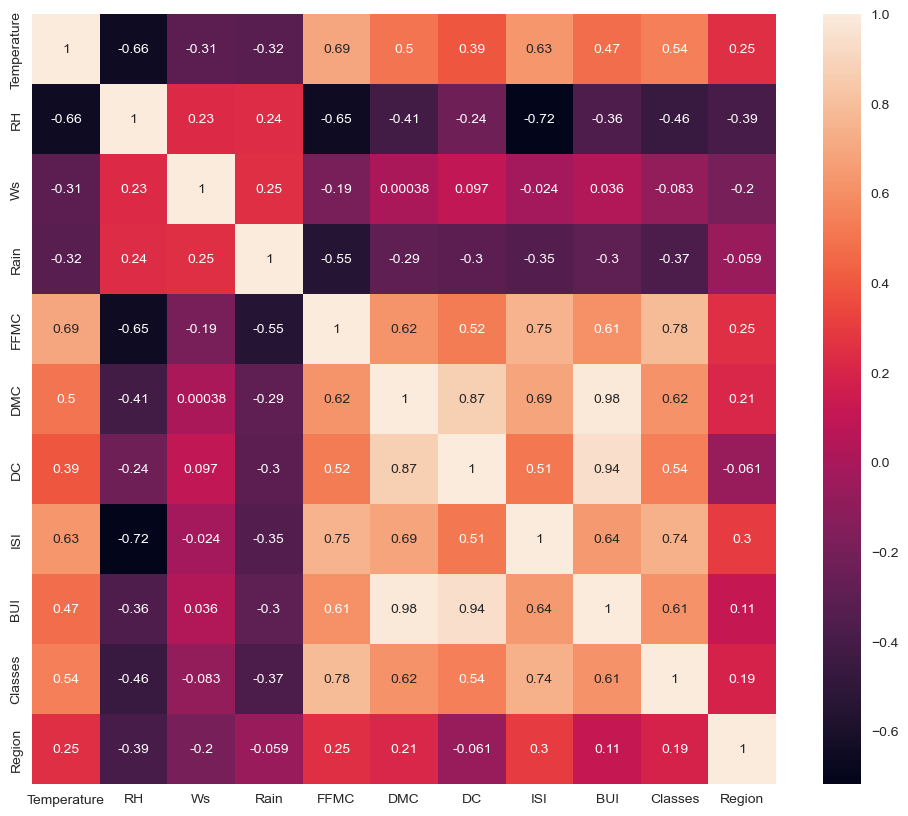

In [32]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [33]:
#finding and droping highly correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(X_train,0.85)


In [34]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

# Scaling and Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_og=X_train
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

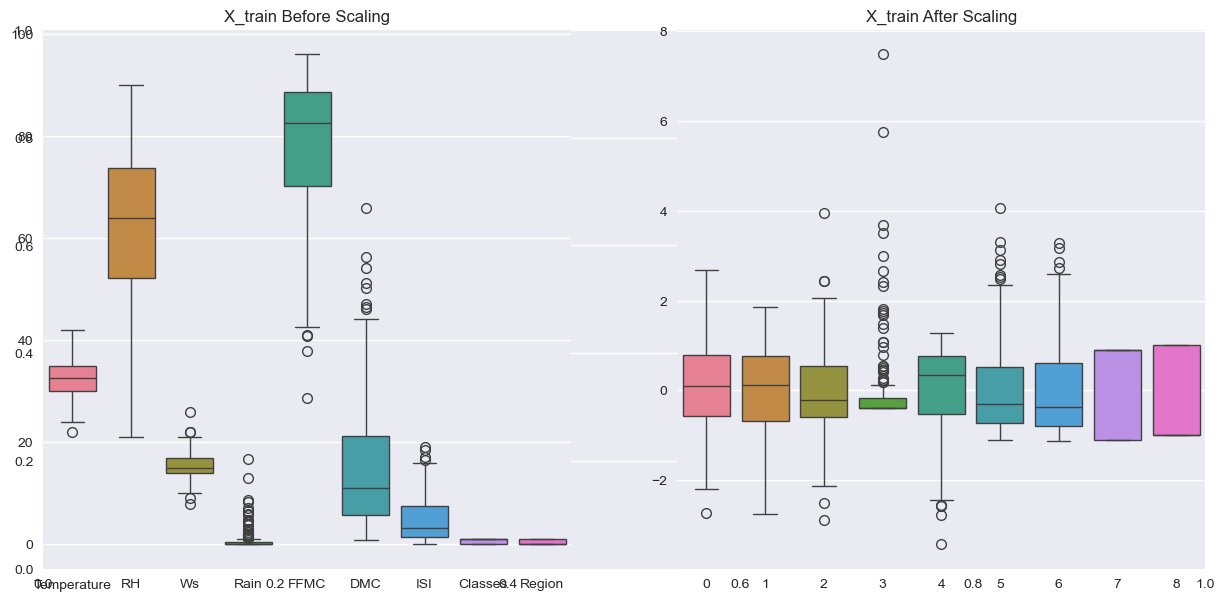

In [36]:
#effect of scaling 
plt.subplots(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot( data=X_train_og )
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train)
plt.title("X_train After Scaling")
plt.show()


# Model Training

Mean absolute error : 0.5468236465249976
R2 Score: 0.9847657384266951


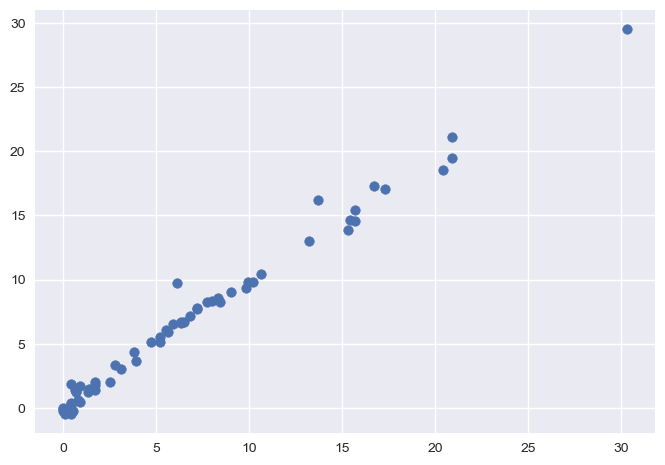

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error : 1.1331759949144085
R2 Score: 0.9492020263112388


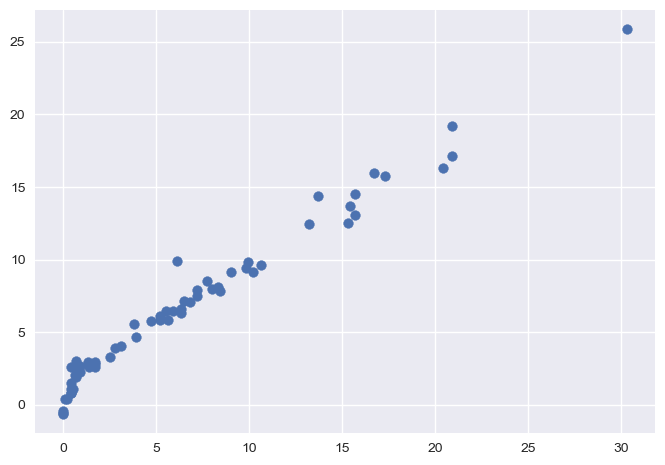

In [38]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error : 0.5642305340105693
R2 Score: 0.9842993364555513


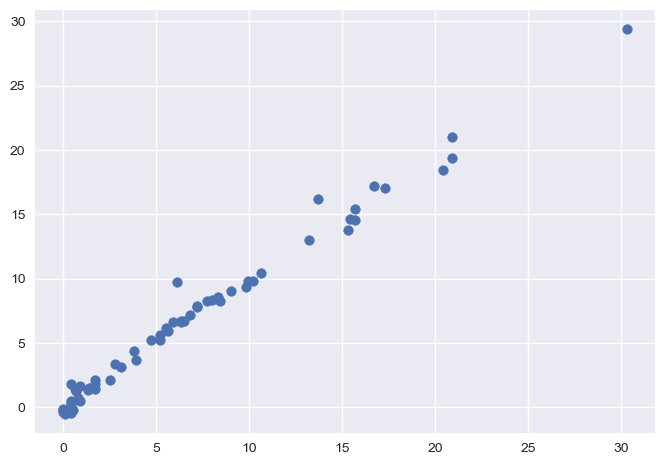

In [39]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error : 1.8822353634896
R2 Score: 0.8753460589519703


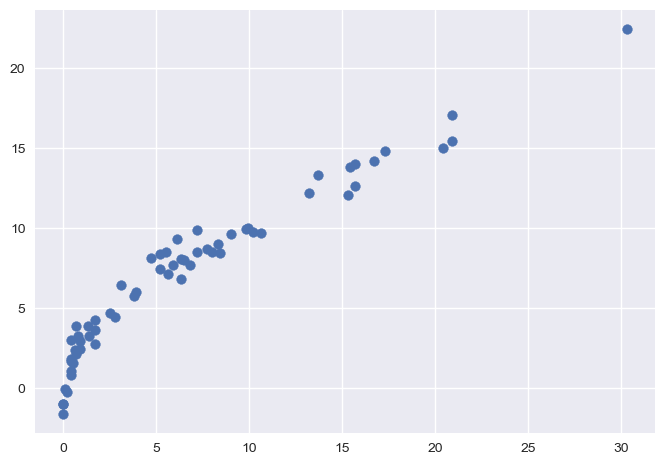

In [40]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

# Hyperparameter Tuning 

In [41]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5)
lasso.fit(X_train,y_train)


LassoCV(cv=5)

In [42]:
lasso.predict(X_test)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [43]:
lasso.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

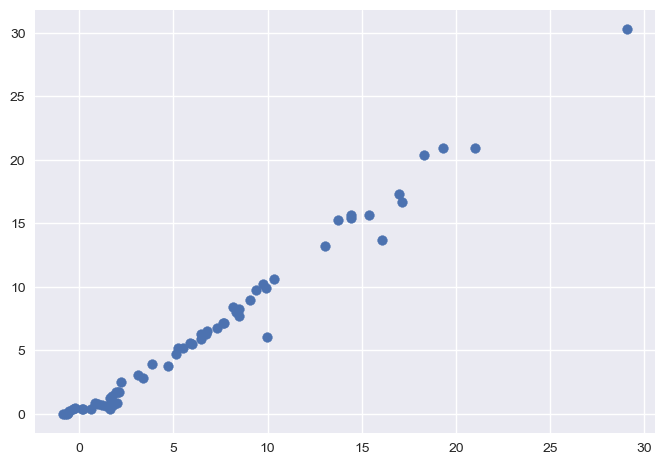

In [44]:
y_pred=lasso.predict(X_test)
plt.scatter(y_pred,y_test)
plt.show()